In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')


/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv
/kaggle/input/the-movies-dataset/ratings.csv
/kaggle/input/the-movies-dataset/links_small.csv
/kaggle/input/the-movies-dataset/credits.csv
/kaggle/input/the-movies-dataset/keywords.csv
/kaggle/input/the-movies-dataset/movies_metadata.csv
/kaggle/input/the-movies-dataset/ratings_small.csv
/kaggle/input/the-movies-dataset/links.csv


# **EDA** 

In [45]:
a=pd.read_csv("/kaggle/input/the-movies-dataset/movies_metadata.csv")

In [ ]:
a.info()

In [2]:
movies=pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
credits=pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df=movies.merge(credits, on="title")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [6]:
df.shape

(4809, 23)

In [7]:
#missing value percentages
df.isna().sum()*100/len(df)

budget                   0.000000
genres                   0.000000
homepage                64.379289
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062383
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020794
revenue                  0.000000
runtime                  0.041589
spoken_languages         0.000000
status                   0.000000
tagline                 17.550426
title                    0.000000
vote_average             0.000000
vote_count               0.000000
movie_id                 0.000000
cast                     0.000000
crew                     0.000000
dtype: float64

In [8]:
#any duplicates?
df.duplicated().sum()

0

In [9]:
#numerical columns
num_cols=[col for col in df.columns if df[col].dtype in ["int64","float64"]]

#categorical columns
cat_cols=[col for col in df.columns if df[col].dtype=="object"]

len(num_cols), len(cat_cols)

(8, 15)

Text(0.5, 1.0, 'Correlation between numerical variables')

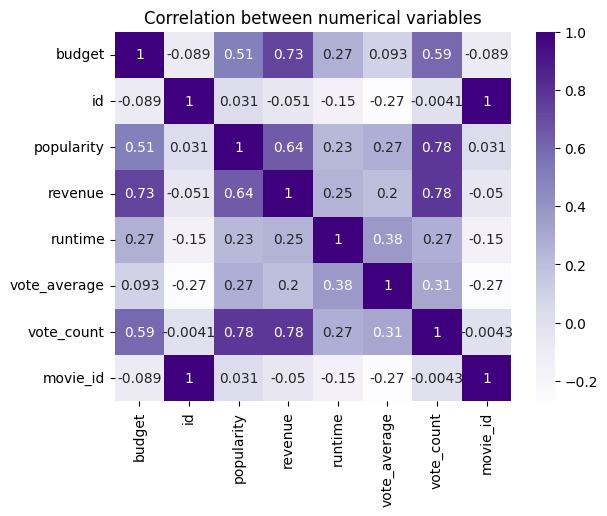

In [10]:
corr_matrix=df[num_cols].corr()


sns.heatmap(corr_matrix,cmap="Purples", annot=True)
plt.title("Correlation between numerical variables")


In [11]:
#removing irrelevant columns for our rec system
to_be_removed_cols= ["budget","homepage","movie_id","original_language","original_title","production_countries","production_companies","revenue","runtime","spoken_languages","status","tagline","vote_count"]

movies=df.drop(columns=to_be_removed_cols, axis=1)
movies.head()

,genres,id,keywords,overview,popularity,release_date,title,vote_average,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,7.2,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,6.3,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,7.6,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,6.1,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
movies.isnull().sum()

genres          0
id              0
keywords        0
overview        3
popularity      0
release_date    1
title           0
vote_average    0
cast            0
crew            0
dtype: int64

In [13]:
#dropping the nulls in overview
movies.dropna(inplace=True)

In [14]:
movies.isnull().sum()

genres          0
id              0
keywords        0
overview        0
popularity      0
release_date    0
title           0
vote_average    0
cast            0
crew            0
dtype: int64

# Content Based Filtering

In [15]:
#formatting values in certain columns
#converting strings -> dictionaries -> extracting ceratin keys -> converting into lists
#removing spaces
import ast

movies["genres"]=movies["genres"].apply(lambda x:[i["name"] for i in ast.literal_eval(x)]).apply(lambda x:[i.replace(" ","") for i in x])
movies.head()   

,genres,id,keywords,overview,popularity,release_date,title,vote_average,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,7.2,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,6.3,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,7.6,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, ScienceFiction]",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,6.1,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [16]:
#formatting the keywords column in a similar way
movies["keywords"]=movies["keywords"].apply(lambda x:[i["name"] for i in ast.literal_eval(x)]).apply(lambda x:[i.replace(" ","") for i in x])
movies.head()   

,genres,id,keywords,overview,popularity,release_date,title,vote_average,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,7.2,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,6.3,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,7.6,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,6.1,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [17]:
#extracting first 3 main leads from the movie
movies["cast"]=movies["cast"].apply(lambda x:[i["name"] for i in ast.literal_eval(x)[:3]]).apply(lambda x:[i.replace(" ","") for i in x])
movies.head()   

,genres,id,keywords,overview,popularity,release_date,title,vote_average,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,7.2,"[SamWorthington, ZoeSaldana, SigourneyWeaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,6.3,"[DanielCraig, ChristophWaltz, LéaSeydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,7.6,"[ChristianBale, MichaelCaine, GaryOldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,6.1,"[TaylorKitsch, LynnCollins, SamanthaMorton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
movies["crew"]=movies["crew"].apply(lambda x:[i["name"] for i in ast.literal_eval(x) if i["job"]=="Director"]).apply(lambda x:[i.replace(" ","") for i in x])
#.apply(lambda x:''.join(x))

movies.head()   

,genres,id,keywords,overview,popularity,release_date,title,vote_average,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,Avatar,7.2,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,Spectre,6.3,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...",Following the death of District Attorney Harve...,112.312950,2012-07-16,The Dark Knight Rises,7.6,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","John Carter is a war-weary, former military ca...",43.926995,2012-03-07,John Carter,6.1,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [19]:
movies["overview"]=movies["overview"].apply(lambda x: x.split())


In [20]:
movies.head()

,genres,id,keywords,overview,popularity,release_date,title,vote_average,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,Avatar,7.2,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,Spectre,6.3,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,The Dark Knight Rises,7.6,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,John Carter,6.1,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [21]:
movies["tags"]=movies["overview"]+movies["genres"]+movies["keywords"]+movies["cast"]+movies["crew"]
movies.head()

,genres,id,keywords,overview,popularity,release_date,title,vote_average,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",150.437577,2009-12-10,Avatar,7.2,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",139.082615,2007-05-19,Pirates of the Caribbean: At World's End,6.9,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",107.376788,2015-10-26,Spectre,6.3,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",112.312950,2012-07-16,The Dark Knight Rises,7.6,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,"[Action, Adventure, ScienceFiction]",49529,"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",43.926995,2012-03-07,John Carter,6.1,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [22]:
movies_df=movies[["id","title","tags"]]
movies_df

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [23]:
#converting list to str and lowercasing everything
movies_df["tags"]=movies_df["tags"].apply(lambda x: " ".join(x)).apply(lambda x: x.lower())
movies_df["tags"][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [24]:
#stemming
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [25]:
def stem(text):
    x=[]

    for i in text.split():
        x.append(ps.stem(i))

    return " ".join(x)

In [26]:
movies_df["tags"]=movies_df["tags"].apply(stem)

In [27]:
movies_df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#top 5000 features occuring most frequently
count_vectorizer=CountVectorizer(max_features=5000,stop_words='english')
tfidf_vectorizer=TfidfVectorizer(max_features=5000,stop_words='english')#considers importance of words too, not just frequency like count vectorizer

In [30]:
count_vectors=count_vectorizer.fit_transform(movies_df["tags"]).toarray()
tfidf_vectors=tfidf_vectorizer.fit_transform(movies_df["tags"]).toarray()

In [31]:
count_vectorizer.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
similarity_cv=cosine_similarity(count_vectors)
similarity_tf=cosine_similarity(tfidf_vectors)

In [34]:
def recommend(movie, similarity):
    movie_index=movies_df[movies_df["title"]==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(enumerate(distances), reverse=True, key=lambda x:x[1])[1:6]

    for movie in movies_list:
        print(movies_df.iloc[movie[0]].title)

In [37]:
recommend("Batman",similarity_tf)

Batman
Batman & Robin
Batman Returns
The Dark Knight Rises
Batman Begins


In [5]:
ratings=pd.read_csv("/kaggle/input/the-movies-dataset/ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [7]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
ratings.duplicated().sum()

0

In [9]:
movies_1=pd.read_csv("/kaggle/input/the-movies-dataset/movies_metadata.csv")
movies_1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
movies_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [12]:
#some rows have swapped release_date and id 
temp = pd.to_numeric(movies_1["id"], errors="coerce")

# Extract index of the rows where conversion failed
invalid_rows = movies_1[temp.isna()]
idx=invalid_rows.index
idx

Index([19730, 29503, 35587], dtype='int64')

In [13]:
#swap the values in the 2 columns
for ids in idx:
    movies_1.loc[ids, ['id', 'release_date']] = movies_1.loc[ids, ['release_date', 'id']].values

In [14]:
#converting to int, checking for errors
movies_1["id"]=movies_1["id"].astype("int")

In [15]:
movies_1["id"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: id
Non-Null Count  Dtype
--------------  -----
45466 non-null  int64
dtypes: int64(1)
memory usage: 355.3 KB


# Popularity Based Recommendations

In [16]:
df1=ratings.merge(movies_1,left_on="movieId", right_on="id")

In [17]:
df1.head()

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,110,1.0,1425941529,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,110,...,1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246.0
1,1,147,4.5,1425942435,False,"{'id': 185682, 'name': 'The Adventures of Anto...",0,"[{'id': 18, 'name': 'Drama'}]",NaN,147,...,1959-05-04,0.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Angel faces hell-bent for violence.,The 400 Blows,False,8.0,363.0
2,1,858,5.0,1425941523,False,NaN,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,858,...,1993-06-24,227799884.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"What if someone you never met, someone you nev...",Sleepless in Seattle,False,6.5,630.0
3,1,1246,5.0,1425941556,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",24000000,"[{'id': 18, 'name': 'Drama'}]",http://www.rocky.com/,1246,...,2006-12-20,155721132.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It ain't over 'til it's over.,Rocky Balboa,False,6.5,858.0
4,1,1968,4.0,1425942148,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,1968,...,1997-02-14,29481428.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What if finding the love of your life meant ch...,Fools Rush In,False,5.8,133.0


In [18]:
df1.shape

(11519146, 28)

In [19]:
rating_counts=df1.groupby("title", as_index=False).agg({"rating":["count","mean"]})
# rating_counts.rename(columns={"rating":"num_ratings"}, inplace=True)
rating_counts

title rating          
                               count      mean
0       !Women Art Revolution    883  2.802945
1         $1,000 on the Black      1  3.000000
2                    $5 a Day    156  2.246795
3                 'Gator Bait    195  3.443590
4                     'R Xmas     86  2.627907
...                       ...    ...       ...
7404                 Ödipussi    253  3.458498
7405         Şaban Oğlu Şaban    123  3.764228
7406             Škola princů      2  3.750000
7407  Šíleně smutná princezna    329  3.126140
7408             Львиная доля      5  2.600000

[7409 rows x 3 columns]

In [20]:
#extracting movies which have number of ratings greater than 250
popular_movies=rating_counts[rating_counts[("rating","count")]>=250]
popular_movies=popular_movies.sort_values(by=("rating","mean"), ascending=False)[:50]

In [21]:
#top 50 popular movies
popular_movies

title rating          
                                                         count      mean
6107                           The Million Dollar Hotel  91082  4.429015
4825                               Sleepless in Seattle  57070  4.339811
3930                                 Once Were Warriors  67662  4.266531
2336                                        Hard Target  13994  4.255074
3160                                     License to Wed  60024  4.230716
1961                                        Five Dances    273  4.217949
3669                                    Murder She Said  28280  4.213030
1321                                    Cousin, Cousine  20855  4.202589
1451                                           Dead Man   7930  4.200820
244                    A Woman, a Gun and a Noodle Shop   8948  4.199039
6541                            The Thomas Crown Affair  44324  4.189107
5728                                     The Good Thief  19947  4.187873
1277               Confession of a Child of the Century  39600  4.182071
1767                                   End of the World   4156  4.179981
6519                            The Talented Mr. Ripley  33987  4.178289
2107                                       Galaxy Quest   5453  4.174583
5173                 Terminator 3: Rise of the Machines  87901  4.169975
3220                                        Local Color  25245  4.167063
6847                    Torrente 2: Mission in Marbella   6303  4.163652
3271                             Lotte from Gadgetville   4873  4.163554
3232                                      Lonely Hearts  18397  4.157716
2329                                    Hannibal Rising   5199  4.157242
4770  Shriek If You Know What I Did Last Friday the ...  40706  4.157078
2619                              Ice Age: The Meltdown   3628  4.150083
4859                                            Solaris  84318  4.149013
7145                                    We're No Angels   8927  4.140865
4029                                      Pandora's Box   4638  4.135727
618                                           Baise-moi   1774  4.135569
3769                                               Nell   6413  4.134570
5198                                       The 39 Steps  77045  4.132299
2595                                      I Spy Returns    944  4.129767
6979                                     Under the Sand  34430  4.128246
1612                              Don't Worry, I'm Fine   5768  4.128207
7279                                   Within the Woods   5966  4.124958
6073                        The Man with the Golden Arm  37152  4.122443
1299                                     Cool Hand Luke  17219  4.121290
1658                                              Dread    520  4.118269
53                                               3-Iron   3563  4.114931
4375                                          Red River   3953  4.114849
6435                                    The Sixth Sense  13649  4.112609
800                                 Birdman of Alcatraz   7705  4.111032
7385                                             Zodiac   2301  4.110604
3905                                             Oldboy    821  4.110231
2708                                          Indochine   3354  4.107633
3496                                    Men in Black II  52474  4.105347
5011                              Stranger Than Fiction  12461  4.105289
71                                          5 Card Stud  56827  4.104167
3916                    On Her Majesty's Secret Service    869  4.102417
2972                                   Kindergarten Cop   4445  4.100112
4594                                       Saving Grace   2671  4.093785

In [22]:
popular_movies.columns.values

array([('title', ''), ('rating', 'count'), ('rating', 'mean')],
      dtype=object)

In [23]:
popular_movies.columns=["_".join(col).strip() for col in popular_movies.columns.values]

In [24]:
popular_movies=popular_movies.rename(columns={"title_":"title"})
popular_movies.head()

,title,rating_count,rating_mean
6107,The Million Dollar Hotel,91082,4.429015
4825,Sleepless in Seattle,57070,4.339811
3930,Once Were Warriors,67662,4.266531
2336,Hard Target,13994,4.255074
3160,License to Wed,60024,4.230716


In [25]:
popular_movies.shape

(50, 3)

In [57]:
# Check for duplicates in each DataFrame
# popular_movies['title'].value_counts()
# movies_1['title'].value_counts()

In [26]:
pop_mov=popular_movies.merge(movies_1, on="title", how="inner")
pop_mov.shape

(60, 26)

In [27]:
pop_mov.drop_duplicates(subset=["title"],inplace=True)

In [28]:
pop_mov.duplicated().sum()

0

In [29]:
pop_mov.shape

(50, 26)

In [30]:
pop_mov["title"].nunique()

50

In [31]:
pop_mov[["id","title",]]

,id,title
0,318,The Million Dollar Hotel
1,858,Sleepless in Seattle
2,527,Once Were Warriors
3,2019,Hard Target
4,2959,License to Wed
5,142115,Five Dances
6,750,Murder She Said
7,5618,"Cousin, Cousine"
8,922,Dead Man
9,44555,"A Woman, a Gun and a Noodle Shop"


# Collaborative filtering based recommendations

In [32]:
df1.head()

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,110,1.0,1425941529,False,"{'id': 131, 'name': 'Three Colors Collection',...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,110,...,1994-05-27,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Three Colors: Red,False,7.8,246.0
1,1,147,4.5,1425942435,False,"{'id': 185682, 'name': 'The Adventures of Anto...",0,"[{'id': 18, 'name': 'Drama'}]",NaN,147,...,1959-05-04,0.0,99.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Angel faces hell-bent for violence.,The 400 Blows,False,8.0,363.0
2,1,858,5.0,1425941523,False,NaN,21000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,858,...,1993-06-24,227799884.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"What if someone you never met, someone you nev...",Sleepless in Seattle,False,6.5,630.0
3,1,1246,5.0,1425941556,False,"{'id': 1575, 'name': 'Rocky Collection', 'post...",24000000,"[{'id': 18, 'name': 'Drama'}]",http://www.rocky.com/,1246,...,2006-12-20,155721132.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,It ain't over 'til it's over.,Rocky Balboa,False,6.5,858.0
4,1,1968,4.0,1425942148,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,1968,...,1997-02-14,29481428.0,109.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What if finding the love of your life meant ch...,Fools Rush In,False,5.8,133.0


In [48]:
#users who rated more than 200 movies
users_200=df1.groupby("userId").agg({"rating":"count"})
users_200=users_200.rename(columns={"rating":"count_ratings"})
users=users_200[users_200["count_ratings"]>200].index
# users_200.shape
filtered_ratings_user=df1[df1["userId"].isin(users)]
filtered_ratings_user

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
672,24,1,4.0,979869938,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1,...,1997-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,24,2,3.0,979974023,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,2,...,1988-10-21,0.0,69.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,False,7.1,44.0
674,24,6,4.0,979870499,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,6,...,1993-10-15,12136938.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.4,79.0
675,24,16,3.0,979870379,False,"{'id': 498, 'name': 'Heart of Gold Collection'...",12800000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,16,...,2000-05-17,40031879.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You don't need eyes to see.,Dancer in the Dark,False,7.7,392.0
676,24,17,3.0,979974163,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.whatisannwyn.co.uk/,17,...,2006-01-26,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One of the living for one of the dead.,The Dark,False,5.6,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11518763,270887,166643,5.0,1495339671,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,166643,...,1930-02-08,0.0,77.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Men Without Women,False,4.7,3.0
11518764,270887,167738,4.0,1495680417,False,NaN,0,[],NaN,167738,...,1997-12-17,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,She was looking for something special. She fou...,Guy,False,6.0,1.0
11518765,270887,168712,5.0,1497927583,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 53,...",NaN,168712,...,2006-10-13,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Terror at 35,000 feet, and falling.",Panic in the Skies,False,0.5,1.0
11518766,270887,169864,5.0,1498363505,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://theshortgamemovie.com/,169864,...,2013-09-20,0.0,100.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,The Short Game,False,7.3,12.0


In [61]:
#movies with atleast 50 ratings
movies_50=df1.groupby("title").agg({"rating":"count"})
movies_50=movies_50.rename(columns={"rating":"count_rating"})
movies=movies_50[movies_50["count_rating"]>=50].index
final_ratings=filtered_ratings_user[filtered_ratings_user["title"].isin(movies)]
final_ratings.head()

,userId,movieId,rating,timestamp,adult,belongs_to_collection,budget,genres,homepage,id,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
673,24,2,3.0,979974023,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,2,...,1988-10-21,0.0,69.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}, {'iso_6...",Released,NaN,Ariel,False,7.1,44.0
674,24,6,4.0,979870499,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,6,...,1993-10-15,12136938.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,False,6.4,79.0
675,24,16,3.0,979870379,False,"{'id': 498, 'name': 'Heart of Gold Collection'...",12800000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,16,...,2000-05-17,40031879.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You don't need eyes to see.,Dancer in the Dark,False,7.7,392.0
676,24,17,3.0,979974163,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.whatisannwyn.co.uk/,17,...,2006-01-26,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One of the living for one of the dead.,The Dark,False,5.6,76.0
677,24,21,4.0,979870629,False,"{'id': 252313, 'name': 'The Endless Summer Col...",0,"[{'id': 99, 'name': 'Documentary'}]",NaN,21,...,1966-06-15,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Endless Summer,False,7.8,23.0


In [62]:
final_ratings.duplicated().sum()

19

In [63]:
final_ratings.drop_duplicates(inplace=True)

In [64]:
final_ratings.duplicated().sum()

0

In [66]:
pivot_table=final_ratings.pivot_table(index="title",columns="userId", values="rating")

In [67]:
pivot_table.shape

(3615, 10282)

In [68]:
pivot_table.fillna(0, inplace=True)

In [69]:
pivot_table

userId,24,46,120,132,150,193,229,231,251,332,...,270631,270634,270654,270684,270688,270734,270750,270769,270828,270887
title,,,,,,,,,,,,,,,,,,,,,
!Women Art Revolution,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
$5 a Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Gator Bait,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
'R Xmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Twas the Night Before Christmas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
À nos amours,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,3.5,3.0,0.0,0.0,0.0,3.0,0.0,0.0
Åke and His World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ödipussi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
from sklearn.metrics.pairwise import cosine_similarity

In [73]:
similarity_scores=cosine_similarity(pivot_table)
similarity_scores

array([[1.        , 0.05085362, 0.081951  , ..., 0.01469053, 0.00780233,
        0.03791879],
       [0.05085362, 1.        , 0.03289351, ..., 0.03169283, 0.00166571,
        0.13800818],
       [0.081951  , 0.03289351, 1.        , ..., 0.02231393, 0.04503459,
        0.04587567],
       ...,
       [0.01469053, 0.03169283, 0.02231393, ..., 1.        , 0.15368922,
        0.02791637],
       [0.00780233, 0.00166571, 0.04503459, ..., 0.15368922, 1.        ,
        0.00862371],
       [0.03791879, 0.13800818, 0.04587567, ..., 0.02791637, 0.00862371,
        1.        ]])

In [74]:
similarity_scores.shape

(3615, 3615)

In [94]:
def recommend_collab(movie):
    #fetch index of the movie from the pivot table
    movie_index=np.where(pivot_table.index==movie)[0][0]
    similar_movies=sorted(enumerate(similarity_scores[movie_index]), key=lambda x:x[1], reverse=True)[1:6]
    for i in similar_movies:
        print(pivot_table.index[i[0]])

In [96]:
recommend_collab("'Twas the Night Before Christmas")

A New Leaf
On the Edge
X: The Unknown
Backdraft
Performance


In [97]:
# for i in sorted(list(enumerate(similarity_scores[np.where(pivot_table.index=="'Gator Bait")[0][0]])),key=lambda x:x[1], reverse=True)[1:6]:
#     print(pivot_table.index[i[0]])